In [1]:
import numpy as np
import pandas as pd
import sys

In [23]:
movies = pd.read_csv("./ml-20m/movies.csv")
tags = pd.read_csv("./ml-20m/tags.csv")
ratings = pd.read_csv("./ml-20m/ratings.csv", nrows=16000000) 

In [24]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [26]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [27]:
tags.drop(['timestamp'], axis=1, inplace=True)
ratings.drop(['timestamp'], axis=1, inplace=True)

In [28]:
len(ratings.movieId.unique())

25164

In [115]:
movies['genres'] = movies['genres'].str.replace('|', ' ')

In [116]:
# Restrict to users that have rated atleast 60 movies
ratings_df = ratings.groupby('userId').filter(lambda x: len(x) >= 60)

In [117]:
ratings_df.shape

(14248972, 3)

In [118]:
ratings.shape

(16000000, 3)

In [119]:
len(ratings.userId.unique())

110725

In [120]:
len(ratings_df.userId.unique())

60448

In [121]:
# whihc all  movies are there in ratings_df, keep only those in movies 
ratings_movie_list = ratings_df['movieId'].unique().tolist()
movies = movies[movies['movieId'].isin(ratings_movie_list)]
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [122]:
merged_df = pd.merge(movies, tags, on='movieId', how='left')
merged_df.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Pixar animation
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,TÃ©a Leoni does not star in this movie


In [123]:
merged_df.fillna("", inplace=True)
merged_df = pd.DataFrame(merged_df.groupby('movieId')['tag'].apply(' '.join))

In [124]:
merged_df.head()

,tag
movieId,
1,Watched computer animation Disney animated fea...
2,time travel adapted from:book board game child...
3,old people that is actually funny sequel fever...
4,chick flick revenge characters chick flick cha...
5,Diane Keaton family sequel Steve Martin weddin...


In [125]:
final_df = pd.merge(movies, merged_df, on='movieId', how='left')

In [126]:
final_df.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy Romance,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Comedy,Diane Keaton family sequel Steve Martin weddin...


In [127]:
final_df['metadata'] = final_df[['tag', 'genres']].apply(' '.join, axis=1)

In [128]:
final_df.head()

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Watched computer animation Disney animated fea...,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel adapted from:book board game child...,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy Romance,old people that is actually funny sequel fever...,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge characters chick flick cha...,chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Comedy,Diane Keaton family sequel Steve Martin weddin...,Diane Keaton family sequel Steve Martin weddin...


In [129]:
final_df.shape

(25093, 5)

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_mat = tfidf.fit_transform(final_df['metadata'])

tfidf_df = pd.DataFrame(tfidf_mat.toarray(), index=final_df.index.tolist()) 
tfidf_df.head() 

,0,1,2,3,4,5,6,7,8,9,...,23519,23520,23521,23522,23523,23524,23525,23526,23527,23528
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
tfidf_df.shape  #each row is a movie

(25093, 23529)

In [132]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)

In [134]:
latent_matrix_df1 = pd.DataFrame(latent_matrix[:,0:200], index = final_df['title'].tolist())

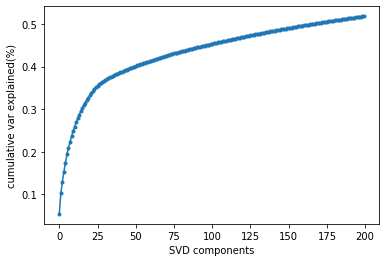

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

explained_var = svd.explained_variance_ratio_.cumsum()
plt.plot(explained_var, '.-')
plt.xlabel("SVD components")
plt.ylabel("cumulative var explained(%)")
plt.show()

In [136]:
latent_matrix.shape

(25093, 200)

In [137]:
ratings_df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [138]:
ratings_df1 = pd.merge(movies[["movieId"]], ratings_df, on="movieId", how = "right")

In [139]:
ratings_df1.head()

,movieId,userId,rating
0,1,3,4.0
1,1,8,4.0
2,1,11,4.5
3,1,13,4.0
4,1,14,4.5


In [140]:
ratings_df2 = ratings_df1.pivot(index='movieId', columns='userId', values = 'rating').fillna(0)
ratings_df2.head()

userId,1,2,3,5,7,8,11,13,14,16,...,110703,110706,110707,110708,110710,110711,110712,110714,110722,110724
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,0.0,5.0,0.0,5.0,0.0,4.0,0.0,3.0,4.0,0.0
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [141]:
ratings_df2.shape

(25093, 60448)

In [142]:
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(ratings_df2)
latent_matrix_df2 = pd.DataFrame(latent_matrix, index = final_df['title'].tolist())

In [144]:
latent_matrix_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),503.065269,-10.274285,118.147003,63.001323,33.324811,144.449895,-58.370170,58.839586,-50.801258,7.799550,...,-17.939855,-6.105493,13.302291,10.795169,-6.692900,-19.925751,8.026037,-17.779819,-3.730701,-11.210057
Jumanji (1995),226.951509,-6.880712,142.044769,-38.659399,-34.455545,9.189622,-59.369870,43.351875,19.546100,-23.091564,...,-5.759097,15.838553,-4.651140,-7.410019,3.693425,12.570774,-3.953578,24.891350,10.353275,3.837859
Grumpier Old Men (1995),94.293293,-45.533961,61.644364,-38.511678,-28.622765,-0.040053,-3.608147,1.412690,-17.248191,-29.525224,...,-0.670059,1.097869,-2.833690,-2.598111,-3.171674,-3.332366,4.101573,-3.049846,4.151136,-5.025944
Waiting to Exhale (1995),23.234759,-25.256543,18.811186,-7.308903,-25.304709,0.539134,-0.387492,3.263833,-4.996824,2.722049,...,0.020090,-1.532013,-2.560055,-0.007939,-1.131231,0.192202,0.356880,-3.906472,-0.169543,-1.063388
Father of the Bride Part II (1995),80.873515,-40.008944,67.371184,-34.720191,-44.404007,13.227772,-10.653996,8.077569,-11.464432,-18.275107,...,-0.786211,-0.501860,-4.795863,-3.421932,-3.465008,3.484481,0.667434,-0.128325,3.316472,-3.240816


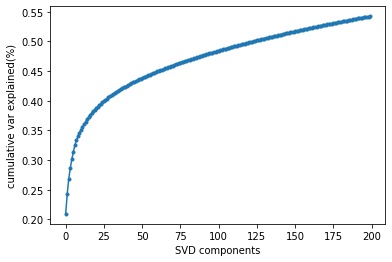

In [145]:
explained_var = svd.explained_variance_ratio_.cumsum()
plt.plot(explained_var, '.-')
plt.xlabel("SVD components")
plt.ylabel("cumulative var explained(%)")
plt.show()

In [146]:
from sklearn.metrics.pairwise import cosine_similarity

In [147]:
latent_matrix_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.027829,0.053107,0.019021,0.003907,0.005143,-0.027165,0.117464,-0.000203,0.000751,0.073886,...,-0.072060,0.014005,-0.030398,0.085778,0.211589,-0.046935,0.008914,0.015430,0.035303,-0.034852
Jumanji (1995),0.011114,0.011237,0.025765,0.002484,0.014320,-0.001906,0.070994,-0.001397,0.008939,0.040755,...,0.017030,0.026041,0.014499,0.021231,-0.076609,-0.022787,0.054812,-0.017474,0.044199,-0.005890
Grumpier Old Men (1995),0.040006,0.073972,-0.004636,-0.001118,0.031234,0.002447,-0.003453,0.000312,-0.001469,0.000665,...,0.021166,-0.003256,-0.014490,0.009730,-0.000665,-0.009319,0.000651,0.005782,-0.006482,0.036551
Waiting to Exhale (1995),0.138340,0.076832,-0.021021,-0.002120,0.100808,0.013420,-0.012406,-0.003615,-0.006283,-0.002056,...,0.037234,0.028600,0.028611,-0.039458,-0.026834,-0.080583,0.047081,-0.010145,-0.005737,0.013725
Father of the Bride Part II (1995),0.040096,0.084344,0.000854,0.000621,-0.013870,-0.000925,0.013931,0.006003,0.006188,0.011663,...,-0.029974,-0.014503,0.007450,0.044511,-0.000263,0.021819,0.004452,-0.039057,0.003836,0.003095


In [148]:
latent_matrix_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),503.065269,-10.274285,118.147003,63.001323,33.324811,144.449895,-58.370170,58.839586,-50.801258,7.799550,...,-17.939855,-6.105493,13.302291,10.795169,-6.692900,-19.925751,8.026037,-17.779819,-3.730701,-11.210057
Jumanji (1995),226.951509,-6.880712,142.044769,-38.659399,-34.455545,9.189622,-59.369870,43.351875,19.546100,-23.091564,...,-5.759097,15.838553,-4.651140,-7.410019,3.693425,12.570774,-3.953578,24.891350,10.353275,3.837859
Grumpier Old Men (1995),94.293293,-45.533961,61.644364,-38.511678,-28.622765,-0.040053,-3.608147,1.412690,-17.248191,-29.525224,...,-0.670059,1.097869,-2.833690,-2.598111,-3.171674,-3.332366,4.101573,-3.049846,4.151136,-5.025944
Waiting to Exhale (1995),23.234759,-25.256543,18.811186,-7.308903,-25.304709,0.539134,-0.387492,3.263833,-4.996824,2.722049,...,0.020090,-1.532013,-2.560055,-0.007939,-1.131231,0.192202,0.356880,-3.906472,-0.169543,-1.063388
Father of the Bride Part II (1995),80.873515,-40.008944,67.371184,-34.720191,-44.404007,13.227772,-10.653996,8.077569,-11.464432,-18.275107,...,-0.786211,-0.501860,-4.795863,-3.421932,-3.465008,3.484481,0.667434,-0.128325,3.316472,-3.240816


In [149]:
# Check similaruty of movie with content and collaboratice matricess
movie_content_vector = np.array(latent_matrix_df1.loc['Toy Story (1995)']).reshape(1,-1)
movie_collab_vector = np.array(latent_matrix_df2.loc['Toy Story (1995)']).reshape(1,-1)

In [151]:
score_1 = cosine_similarity(latent_matrix_df1, movie_content_vector).reshape(-1)
score_2 = cosine_similarity(latent_matrix_df2, movie_collab_vector).reshape(-1)

#average score 
av_score = (score_1 + score_2)/2.0

In [152]:
movie_sim = {'content':score_1, 'collab': score_2, 'hybrid':av_score}
simil_df = pd.DataFrame(movie_sim, index=latent_matrix_df1.index)

In [153]:
simil_df.head()

,content,collab,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Jumanji (1995),0.073692,0.570838,0.322265
Grumpier Old Men (1995),0.058560,0.460268,0.259414
Waiting to Exhale (1995),0.029523,0.277400,0.153462
Father of the Bride Part II (1995),0.052702,0.450922,0.251812


In [154]:
simil_df.sort_values('content', ascending=False) # based on movie content toystory is similar to toy story2

,content,collab,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Toy Story 2 (1999),0.960975,0.765740,0.863358
"Bug's Life, A (1998)",0.905825,0.654965,0.780395
Ratatouille (2007),0.898999,0.429254,0.664126
"Monsters, Inc. (2001)",0.883235,0.621118,0.752176
...,...,...,...
"Life, Above All (2010)",-0.113142,0.073144,-0.019999
Nell (1994),-0.117324,0.341333,0.112004
Stevie (2002),-0.117623,0.174810,0.028593
Newsfront (1978),-0.123699,0.029111,-0.047294


In [155]:
simil_df.sort_values('collab', ascending=False) # based on user who likes Toystory would like Toystory2 

,content,collab,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Toy Story 2 (1999),0.960975,0.765740,0.863358
Aladdin (1992),0.413372,0.686649,0.550010
"Lion King, The (1994)",0.456150,0.675752,0.565951
Star Wars: Episode IV - A New Hope (1977),0.020970,0.675528,0.348249
...,...,...,...
"Koumiko Mystery, The (Mystère Koumiko, Le) (1967)",0.031572,-0.021734,0.004919
Steep (2007),-0.001602,-0.021942,-0.011772
Cheers for Miss Bishop (1941),-0.000040,-0.023719,-0.011880
"Stranger, The (Agantuk) (Visitor, The) (1991)",0.009928,-0.025073,-0.007573


In [156]:
simil_df.sort_values('hybrid', ascending=False)

,content,collab,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Toy Story 2 (1999),0.960975,0.765740,0.863358
"Bug's Life, A (1998)",0.905825,0.654965,0.780395
"Monsters, Inc. (2001)",0.883235,0.621118,0.752176
Finding Nemo (2003),0.869589,0.603694,0.736641
...,...,...,...
Love unto Death (L'amour a mort) (1984),-0.096918,0.016217,-0.040350
Cane Toads: The Conquest (2010),-0.092350,0.002899,-0.044726
"Amish Murder, An (2013)",-0.090066,-0.000880,-0.045473
Newsfront (1978),-0.123699,0.029111,-0.047294
